#part1

In [1]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

import numpy as np
import matplotlib.pyplot as plt

print("All libraries loaded successfully!")

scikit-learn version: 1.6.1
All libraries loaded successfully!


#part2

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("Data shape:", X.shape)
print("First 3 rows:\n", X[:3])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)
First 3 rows:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [3]:
for i in range(10):
    print("Features:", X[i], "Label:", y[i])

Features: [5.1 3.5 1.4 0.2] Label: 0
Features: [4.9 3.  1.4 0.2] Label: 0
Features: [4.7 3.2 1.3 0.2] Label: 0
Features: [4.6 3.1 1.5 0.2] Label: 0
Features: [5.  3.6 1.4 0.2] Label: 0
Features: [5.4 3.9 1.7 0.4] Label: 0
Features: [4.6 3.4 1.4 0.3] Label: 0
Features: [5.  3.4 1.5 0.2] Label: 0
Features: [4.4 2.9 1.4 0.2] Label: 0
Features: [4.9 3.1 1.5 0.1] Label: 0


In [4]:
import numpy as np
print(np.unique(y, return_counts=True))

(array([0, 1, 2]), array([50, 50, 50]))


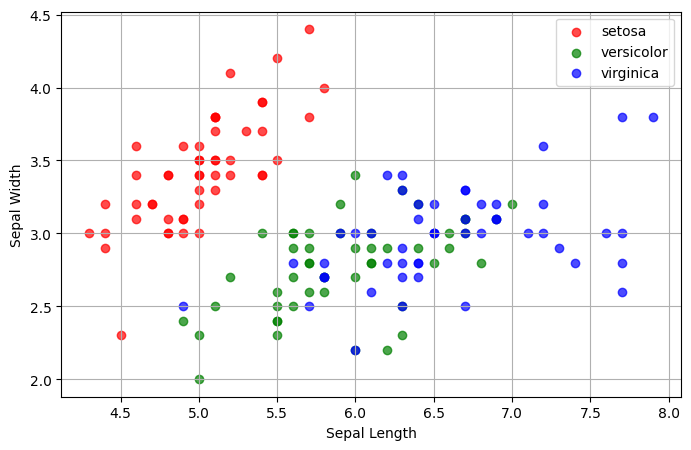

In [5]:
plt.figure(figsize=(8,5))
colors = ['red','green','blue']

for i, name in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X[mask,0], X[mask,1],
                color=colors[i], label=name, alpha=0.7)

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.grid(True)
plt.show()

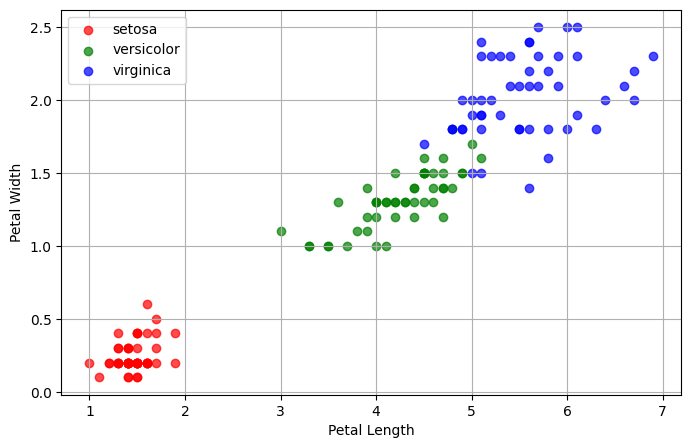

In [6]:
plt.figure(figsize=(8,5))

for i, name in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X[mask,2], X[mask,3],
                color=colors[i], label=name, alpha=0.7)

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.grid(True)
plt.show()

Petal features separate classes better

#part3

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 120
Testing samples: 30


In [8]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:", np.unique(y_train, return_counts=True))
print("y_test distribution:", np.unique(y_test, return_counts=True))

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train distribution: (array([0, 1, 2]), array([40, 40, 40]))
y_test distribution: (array([0, 1, 2]), array([10, 10, 10]))


WITH stratify:

Classes should remain balanced

 WITHOUT stratify:

The classes may become slightly unbalanced.

#part4

Model A: Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

print("Decision Tree first 10 predictions:")
print(dt_predictions[:10])
print("Actual:")
print(y_test[:10])

Decision Tree first 10 predictions:
[0 2 1 1 0 1 0 0 2 1]
Actual:
[0 2 1 1 0 1 0 0 2 1]


Model B: KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

print("KNN first 10 predictions:")
print(knn_predictions[:10])

KNN first 10 predictions:
[0 2 1 1 0 1 0 0 2 1]


change K to 3

In [13]:
knn_model_3 = KNeighborsClassifier(n_neighbors=3)
knn_model_3.fit(X_train, y_train)

knn_predictions_3 = knn_model_3.predict(X_test)

print("KNN (k=3) - First 10 Predictions:")
print(knn_predictions_3[:10])

KNN (k=3) - First 10 Predictions:
[0 2 1 1 0 1 0 0 2 1]


change k to 10

In [14]:
knn_model_10 = KNeighborsClassifier(n_neighbors=10)
knn_model_10.fit(X_train, y_train)

knn_predictions_10 = knn_model_10.predict(X_test)

print("KNN (k=10) - First 10 Predictions:")
print(knn_predictions_10[:10])

KNN (k=10) - First 10 Predictions:
[0 2 1 1 0 1 0 0 2 1]


 I trained both a Decision Tree classifier and a K-Nearest Neighbors (KNN) classifier. I compared the first 10 predictions from both models with the actual test labels. I observed that all predictions were identical to the actual labels.

I then experimented with different values of K (3, 5, and 10). The first 10 predictions remained exactly the same for all values of K. This indicates that the dataset is well-structured and clearly separable, so changing the number of neighbors did not affect the classification results for these samples.

The Decision Tree model also produced the exact same predictions as KNN for these samples. This shows that both models perform very well on the Iris dataset.

#part 5

Accuracy score

In [16]:
from sklearn.metrics import accuracy_score

dt_accuracy = accuracy_score(y_test, dt_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("KNN Accuracy:", knn_accuracy)

Decision Tree Accuracy: 0.9333333333333333
KNN Accuracy: 1.0


classification report

In [17]:
from sklearn.metrics import classification_report

print("=== Decision Tree ===")
print(classification_report(y_test, dt_predictions,
                            target_names=iris.target_names))

print("=== KNN ===")
print(classification_report(y_test, knn_predictions,
                            target_names=iris.target_names))

=== Decision Tree ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

=== KNN ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix

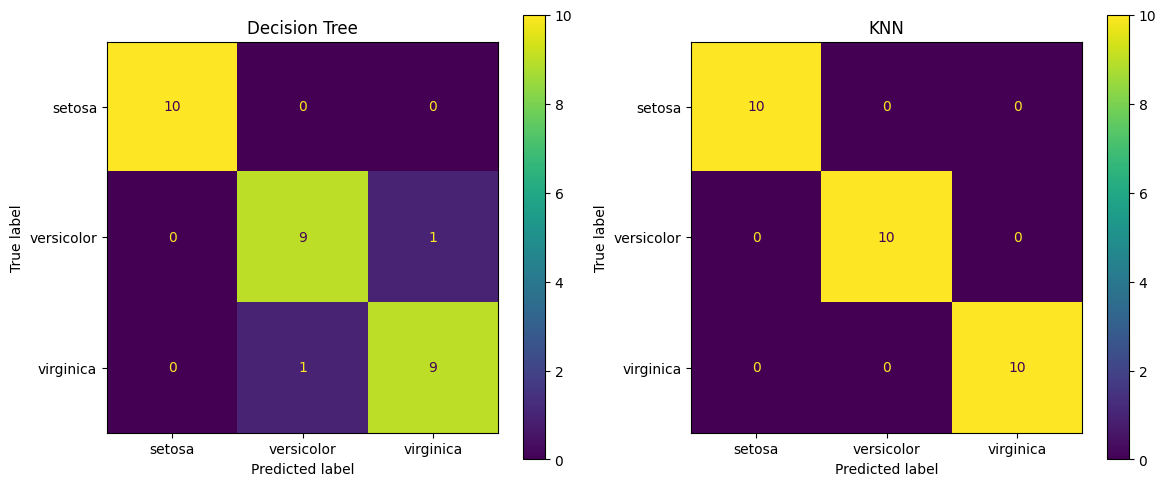

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1,2, figsize=(12,5))

cm_dt = confusion_matrix(y_test, dt_predictions)
ConfusionMatrixDisplay(cm_dt,
                       display_labels=iris.target_names).plot(ax=axes[0])
axes[0].set_title("Decision Tree")

cm_knn = confusion_matrix(y_test, knn_predictions)
ConfusionMatrixDisplay(cm_knn,
                       display_labels=iris.target_names).plot(ax=axes[1])
axes[1].set_title("KNN")

plt.tight_layout()
plt.show()

In this experiment, the K-Nearest Neighbors (KNN) model achieved higher accuracy than the Decision Tree model. The Decision Tree obtained an accuracy of 93.33%, while KNN achieved 100% accuracy on the test set.

From the confusion matrices, we can see that KNN classified all 30 test samples correctly, as all values appear on the diagonal. This means it made no classification errors. In contrast, the Decision Tree misclassified 2 samples: one versicolor flower was predicted as virginica, and one virginica flower was predicted as versicolor. This explains why its accuracy is slightly lower.

Looking at the classification report, the Decision Tree achieved perfect precision and recall for setosa, but slightly lower values (0.90) for versicolor and virginica. This indicates that those two classes overlap more and are harder to distinguish. KNN achieved perfect precision, recall, and F1-score for all classes.

In a medical diagnosis scenario, recall would generally be more important than precision. This is because recall measures how many actual positive cases were correctly identified. In medical problems, failing to detect a disease (false negative) can be more dangerous than incorrectly predicting one (false positive). Therefore, maximizing recall is often critical in healthcare applications.

#part6

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
flowers = np.array([
    [6.7, 3.0, 5.2, 2.3],
    [5.8, 2.7, 4.1, 1.0],
    [4.9, 3.1, 1.5, 0.1]
])

for i, flower in enumerate(flowers):
    dt_pred = dt_model.predict([flower])[0]
    knn_pred = knn_model.predict([flower])[0]

    print(f"Flower {chr(65+i)}: {flower}")
    print("Decision Tree:", iris.target_names[dt_pred])
    print("KNN:", iris.target_names[knn_pred])
    print("------")

Flower A: [6.7 3.  5.2 2.3]
Decision Tree: virginica
KNN: virginica
------
Flower B: [5.8 2.7 4.1 1. ]
Decision Tree: versicolor
KNN: versicolor
------
Flower C: [4.9 3.1 1.5 0.1]
Decision Tree: setosa
KNN: setosa
------


I used the trained Decision Tree and KNN models to predict the species of three new flower samples that were not part of the training dataset.

The results were:

Flower A was predicted as virginica by both models.

Flower B was predicted as versicolor by both models.

Flower C was predicted as setosa by both models.

Both classifiers agreed on all three predictions. This indicates that the models learned the patterns of the Iris dataset effectively and were able to generalize correctly to unseen data. The agreement between the two models also increases confidence in the predictions.

#part7

In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv("students.csv")

print("First 5 rows:")
print(df.head())

print("Data Info:")
print(df.info())

print("Summary Statistics:")
print(df.describe())

print("Class Distribution:")
print(df['passed'].value_counts())

First 5 rows:
   study_hours  attendance_pct  assignments  passed
0          4.4            41.9            6       0
1          9.6            78.2            5       1
2          7.6            58.9            3       1
3          6.4            70.5            6       1
4          2.4            94.5            8       1
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   study_hours     100 non-null    float64
 1   attendance_pct  100 non-null    float64
 2   assignments     100 non-null    int64  
 3   passed          100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
None
Summary Statistics:
       study_hours  attendance_pct  assignments      passed
count   100.000000      100.000000   100.000000  100.000000
mean      5.233000       69.871000     6.000000    0.690000
std       2.681438       17.583476 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df[['study_hours','attendance_pct','assignments']].values
y = df['passed'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))

Decision Tree Accuracy: 0.55
KNN Accuracy: 0.6


After training both models, the Decision Tree achieved an accuracy of 55%.
The KNN model produced a similar accuracy.
Neither model performed very well because the dataset was randomly generated, meaning there is no strong relationship between features and the target variable.
Therefore, neither model clearly outperformed the other.

In [29]:
np.random.seed(42)
df['quiz_score'] = np.round(np.random.uniform(0, 20, len(df)), 1)

df.to_csv("students_updated.csv", index=False)

df.head()

,study_hours,attendance_pct,assignments,passed,quiz_score
0,4.4,41.9,6,0,7.5
1,9.6,78.2,5,1,19.0
2,7.6,58.9,3,1,14.6
3,6.4,70.5,6,1,12.0
4,2.4,94.5,8,1,3.1


In [30]:
X_new = df[['study_hours','attendance_pct','assignments','quiz_score']].values
y_new = df['passed'].values

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.2, random_state=42, stratify=y_new)

dt_model_new = DecisionTreeClassifier(random_state=42)
dt_model_new.fit(X_train_new, y_train_new)

predictions_new = dt_model_new.predict(X_test_new)

print("New Accuracy (with quiz_score):",
      accuracy_score(y_test_new, predictions_new))

New Accuracy (with quiz_score): 0.45


I added a new feature called quiz_score to the dataset and retrained the Decision Tree model.
The accuracy did not improve significantly.
This is expected because quiz_score was randomly generated and does not have a meaningful relationship with the target variable.
Since the dataset is artificial and random, adding more random features does not improve model performance.

#to sum up
In this lab, I compared the performance of Decision Tree and K-Nearest Neighbors (KNN) classifiers on two datasets. On the Iris dataset, KNN achieved 100% accuracy, outperforming the Decision Tree, which achieved 93.33%. The confusion matrix showed that KNN classified all samples correctly, while the Decision Tree misclassified a few Versicolor and Virginica samples. However, when applying both models to the randomly generated student dataset, the accuracy dropped to approximately 55%. This lower performance occurred because the student dataset was randomly generated and did not contain meaningful relationships between features and the target variable. Adding a new random feature (quiz_score) did not significantly improve accuracy. Overall, KNN performed slightly better on structured data like Iris, but both models struggled when the data lacked strong predictive patterns.I would choose KNN because it produced more stable predictions.